# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Por definición, cda una de las entradas de A es 
 
$a_{ij}= \left\{ \begin{array}{lcc} (1-p)/n + (p\,w_{ij})/c_j & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

Por definición, las entradas de W son  

$w_{ij}= \left\{ \begin{array}{lcc} 1 & si & \text{la página j tiene link a la página i} \\ \\ 0 & si & \text{la página j no tiene link a la página i} \end{array} \right.$

Sabemos que la diagonal es 0 pues no hay autolinks

D es una matriz diagonal con elementos djj como
 
$d_{jj}= \left\{ \begin{array}{lcc} 1/c_j & si & c_j \neq 0 \\ \\ 0 & si & c_j=0 \end{array} \right.$

entonces teniendo en cuenta el la definición de rango, las entradas de WD serán

$(WD)_{ij}= \left\{ \begin{array}{lcc} w_{ij}/c_j & si & c_j \neq 0 \\ \\ 0 & si & c_j=0 \end{array} \right.$

luego 

$(pWD)_{ij}= \left\{ \begin{array}{lcc} (p\,w_{ij})/c_j & si & c_j \neq 0 \\ \\ 0 & si & c_j=0 \end{array} \right.$

Por otro lado tenemos z, un vector de dimensión n con elementos como 

$z_{j}= \left\{ \begin{array}{lcc} (1-p)/n & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

y e, un vector de tamaño n con todas sus entradas iguales a 1

el producto $ez^t$ tendría los elementos como 

$(ez^t)_{ij}= \left\{ \begin{array}{lcc} (1-p)/n & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

concluyendo, la suma $pWD + ez^t$ se define por entrada como

$(pWD + ez^t)_{ij}= \left\{ \begin{array}{lcc} (1-p)/n + (p\,w_{ij})/c_j  & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

Lo cual es igual a A.

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

$ \textbf{Comienzo demostrando que (I - pWD) tiene factorización LU} \\ $

$ \text{Llamo a (I - pWD) = H} $

$ \text{Queremos ver que es, y todas sus submatrices, inversible. Sabiendo que } det(H) = det(H^t) $

$ (1.)\;\text{Comienzo viendo si } H^t\:es\:EDD $

$ \forall i\; con \: 1 \leqslant i \leqslant n \Rightarrow \ |(H^t)_{ii}| > \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| $

$ Como \; |(H^t)_{ii}| = 1 \; , \; \forall i \; con \: 1 \leqslant i \leqslant n , \; entonces\; es\; lo\; mismo$

$ \forall i\; con \: 1 \leqslant i \leqslant n \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| $

$ Ahora $

$ \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| = \sum_{j=1\wedge j\neq i}^{n} |-p\frac{(W^t)_{ij}}{c_i}| $

$ Como\; p>0, \:y\; \frac{(W^t)_{ij}}{c_i} \geq 0 $

$ \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| = \sum_{j=1\wedge j\neq i}^{n} p\frac{(W^t)_{ij}}{c_i} = p* \sum_{j=1\wedge j\neq i}^{n} \frac{(W^t)_{ij}}{c_i} $

$ Como \; p < 1 $

$ p* \sum_{j=1\wedge j\neq i}^{n} \frac{(W^t)_{ij}}{c_i} < \sum_{j=1\wedge j\neq i}^{n} \frac{(W^t)_{ij}}{c_i} = \frac{1}{c_i}* \sum_{j=1\wedge j\neq i}^{n} (W^t)_{ij} $

$ Ahora \; \sum_{j=1\wedge j\neq i}^{n} (W^t)_{ij} = c_i \; , entonces $

$ \frac{1}{c_i}* \sum_{j=1\wedge j\neq i}^{n} (W^t)_{ij} = \frac{c_i}{c_i} = 1,\; por\; lo\; tanto,\; H^t\; es\; EDD$

$ \text{Si H transpuesta es EDD, entonces H transpuesta es inversible.} $
$ \text{Si H transpuesta es inversible entonces H es inversible.} $

$(2.)\; \text{Ahora queremos probar que si H transpuesta es EDD, entonces sus submatrices también son EDD} $

$ Caso\; base: \forall i\; con \: 1 \leqslant i \leqslant n \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{n} |(H^t)[1:n,1:n]_{ij}|,\; ya\; está\; demostrado $

$ H.I.: \forall i\; con \: 1 \leqslant i \leqslant k \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{k} |(H^t)[1:k,1:k]_{ij}| $

$ Qpq :  \forall i\; con \: 1 \leqslant i \leqslant k-1 \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}| $

$ Por\; hipótesis\; inductiva\; puedo\; decir $

$ \forall i\; con \: 1 \leqslant i \leqslant k-1 \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{k} |(H^t)[1:k,1:k]_{ij}| $

$ Ahora $

$ \sum_{j=1\wedge j\neq i}^{k} |(H^t)[1:k,1:k]_{ij}| = |(H^t)[1:k,1:k]_{ik}| + \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}| $

$ Como\; |(H^t)[1:k,1:k]_{ik}| \geq 0 $

$ |(H^t)[1:k,1:k]_{ik}| + \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}| \geq \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}|  $

$ Entonces,\; juntando\; las\; desigualdades $

$ 1 > \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}|\;, \forall i\; con \: 1 \leqslant i \leqslant k-1 $

$ Lo\; que\; queríamos\; probar $

$ \text{Si cada submatriz de H transpuesta es EDD, entonces cada submatriz de H transpuesta es inversible.} $
$ \text{Si cada submatriz de H transpuesta es inversible entonces cada submatriz de H es inversible.} $

$ Siendo\; H \in R^{\,n\times n}\; y\; como\; \forall k\; con\; 1 \leq k \leq n,\; H[1:k,1:k]\; es\; invertible,\\ entonces\; existe\; factorización\; LU\; de\; H$


Me fijo ahora si (I - pWD) está bien condicionada y cómo influye el valor de p. Para esto utilizaré en principio una matriz T = (I - pWD) de tamaño (6x6) tal que todas las páginas tengan links a todas las demás.

Podemos apreciar que para valores de p entre 0 y 0.8, el número de condición de H es cercano a 1 y este comuenza a crecer abruptamente para p mayor a 0.8

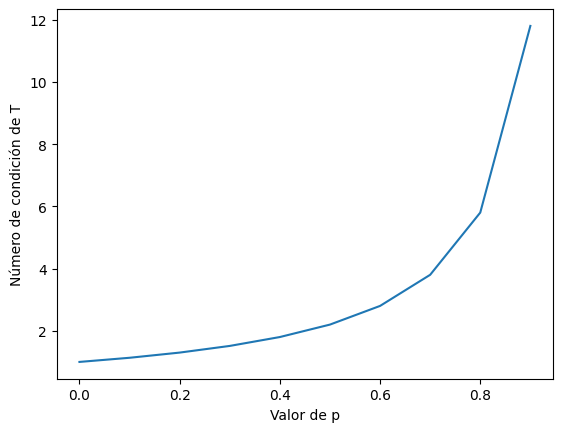

In [25]:
from funciones import *

def calcularA(W, p):
    npages = W.shape[0]

    #Definimos D
    D = np.zeros(W.shape)
    for i in range(npages):
        if sumColumna(W, i) != 0:
            D[i,i] = 1/sumColumna(W, i)
        else:
            D[i,i] = 0
    
    #Definimos A
    A = np.identity(npages) - np.dot(p, np.dot(W,D)) 
    return A

W = np.array([[0,1,1,1,1,1],[1,0,1,1,1,1],[1,1,0,1,1,1],[1,1,1,0,1,1],[1,1,1,1,0,1],[1,1,1,1,1,0]]) #6 pag, 30 links
cond = []
ps = np.linspace(0,0.9,10)

for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0,1,0.1),cond)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de T')
plt.show()

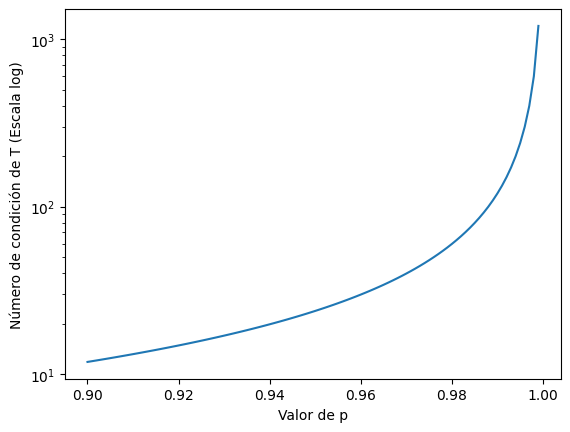

In [28]:
ps = np.linspace(0.9,0.999,100)
cond = []
for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0.9,1,0.001),cond)
plt.yscale("log")
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de T (Escala log)')
plt.show()

Hagamos el mismo análisis para M = (I - pWD) de (6x6) pero donde W es una matriz de densidad media. (15 links a otras páginas)

Podemos ver que el número de condición sigue cercano a 1 para valores de p entre 0 y 0.8, y este comienza a crecer abruptamente para valores mayores a 0.8

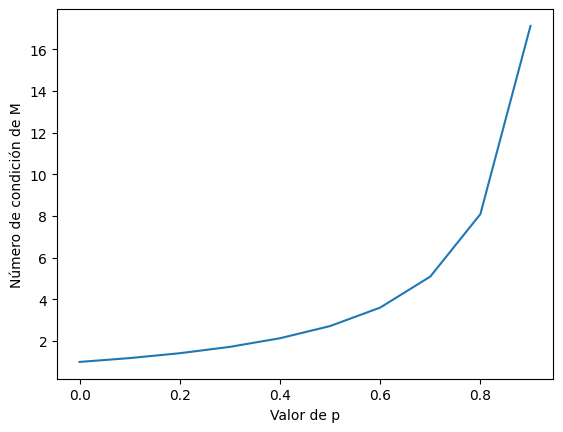

In [29]:
W = np.array([[0,0,1,0,1,0],[1,0,0,1,0,1],[1,0,0,1,0,0],[0,0,1,0,1,1],[0,1,0,1,0,0],[1,0,1,0,1,0]]) #6 pag, 30 links
cond = []
ps = np.linspace(0,0.9,10)

for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0,1,0.1),cond)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de M')
plt.show()

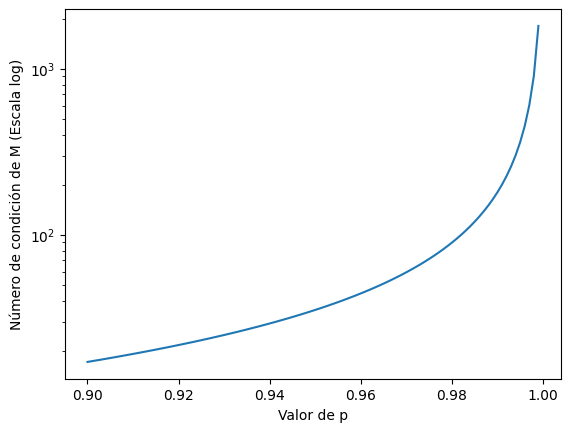

In [30]:
ps = np.linspace(0.9,0.999,100)
cond = []
for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0.9,1,0.001),cond)
plt.yscale("log")
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de M (Escala log)')
plt.show()

---

Ahora hago el mismo análisis para B = (I - pWD) pero donde W es una matriz de densidad baja (4 links a otras páginas). 

Esta vez el número de condición crece de forma casi constante, y mantiene valores cercanos a 1 para todo p entre 0 y 1. Esto se debe a que, si W tiene muchas entradas 0, el resultado de (I - pWD) será muy parecido a la identidad, la que tiene número de condición 1.

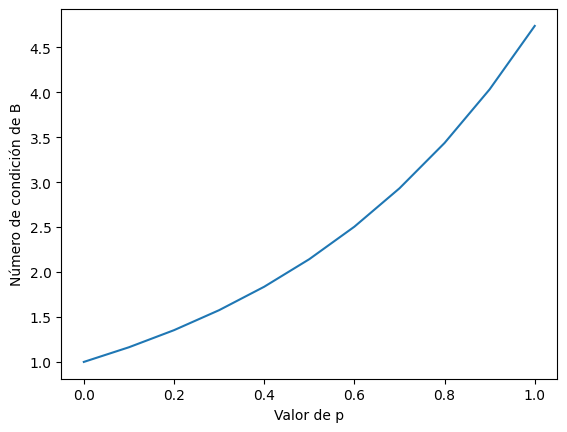

In [31]:

W = np.array([[0,0,0,0,1,0],[0,0,1,0,0,0],[0,0,0,0,0,0],[0,0,0,0,1,0],[0,1,0,0,0,0],[0,0,0,0,0,0]]) #6 pag, 3 links
cond = []
ps = np.linspace(0,1,11)

for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0,1.1,0.1),cond)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de B')
plt.show()

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [3]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


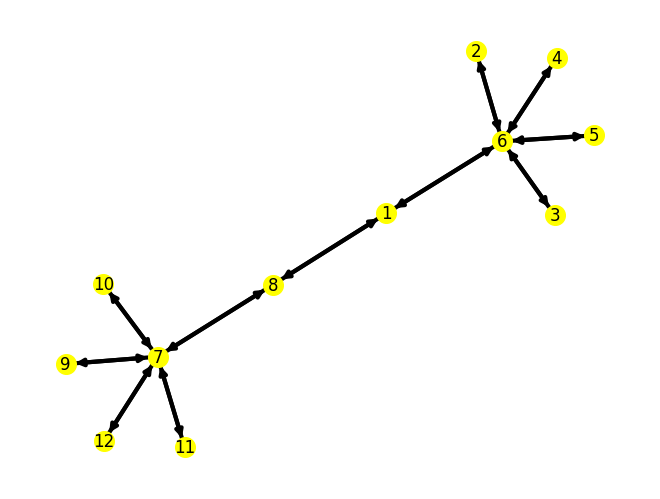

In [4]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

Ejes:  [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)]


(array([6, 6, 1, 1, 1, 1, 1]),
 array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]))

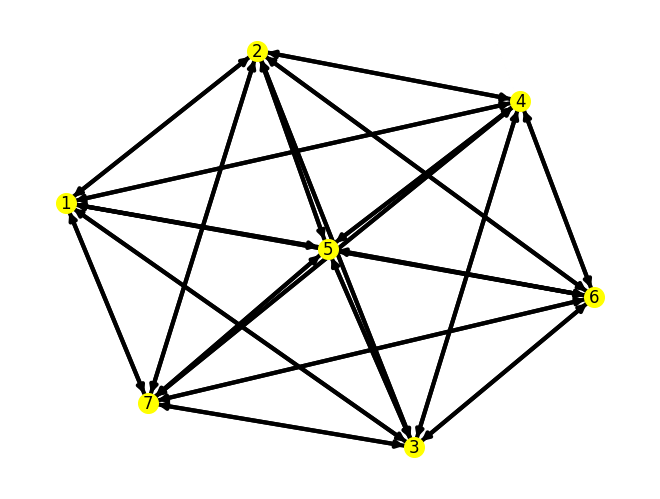

In [5]:
todos_conectados = np.array([[0,1,1,1,1,1,1],[1,0,1,1,1,1,1],[1,1,0,1,1,1,1],[1,1,1,0,1,1,1],[1,1,1,1,0,1,1],[1,1,1,1,1,0,1],[1,1,1,1,1,1,0]])

dibujarGrafo(todos_conectados)

obtenerMaximoRankingScore(todos_conectados, p)
calcularRanking(todos_conectados,p) #Bug sin sentido acá


Ejes:  []


(array([1, 1, 1, 1, 1]), array([0.2, 0.2, 0.2, 0.2, 0.2]))

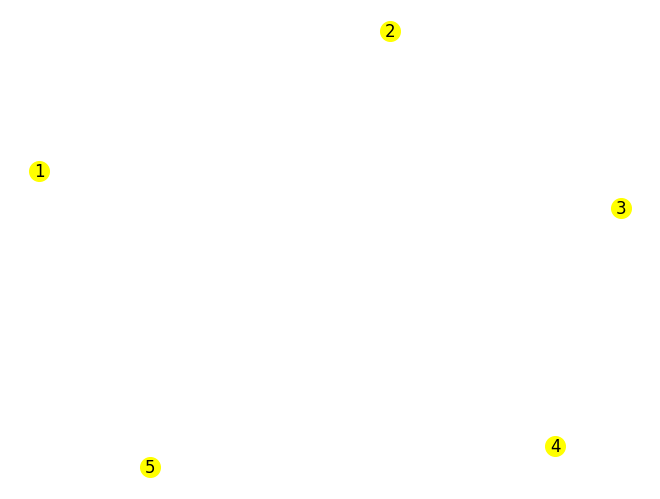

In [6]:
ninguno_conectado = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
dibujarGrafo(ninguno_conectado)

calcularRanking(ninguno_conectado, 0.5)

Ejes:  [(1, 8), (2, 1), (2, 4), (3, 2), (3, 7), (4, 2), (4, 3), (5, 4), (6, 5), (6, 8), (7, 3), (7, 6), (8, 6), (8, 7)]
Ranking: (array([7, 3, 3, 1, 7, 3, 3, 1]), array([0.0952381 , 0.13095238, 0.13095238, 0.14285714, 0.0952381 ,
       0.13095238, 0.13095238, 0.14285714]))


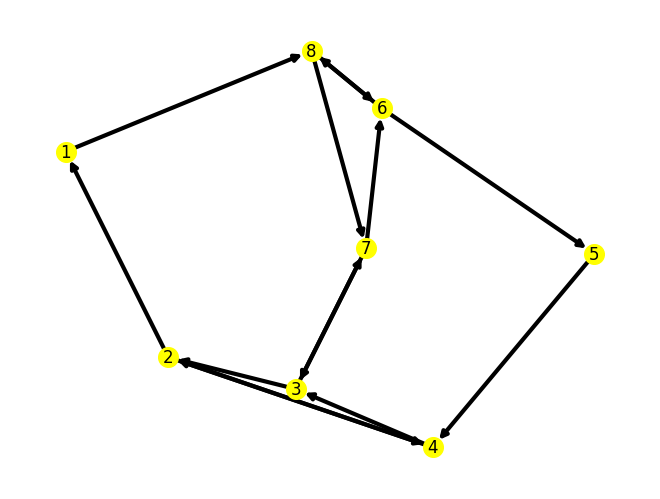

In [7]:
caso_particular1 = np.array([[0,1,0,0,0,0,0,0],[0,0,1,1,0,0,0,0],[0,0,0,1,0,0,1,0],[0,1,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,1],[0,0,1,0,0,0,0,1],[1,0,0,0,0,1,0,0]])

dibujarGrafo(caso_particular1)

print('Ranking:',calcularRanking(caso_particular1, 0.5))

Ejes:  [(1, 2), (1, 8), (2, 3), (3, 4), (4, 2), (5, 1), (5, 6), (5, 7), (6, 5), (6, 7), (7, 5), (7, 6), (8, 1), (8, 9), (9, 10), (10, 8), (10, 9)]
Ranking: (array([8, 1, 2, 3, 7, 9, 9, 6, 5, 4]), array([0.08997525, 0.12570721, 0.11285361, 0.1064268 , 0.09375   ,
       0.0875    , 0.0875    , 0.09740099, 0.09925743, 0.09962871]))


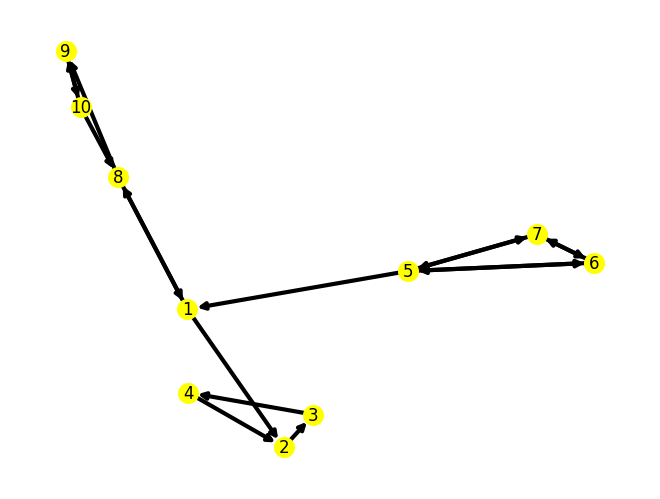

In [8]:
caso_particular2 = np.array([[0,0,0,0,1,0,0,1,0,0],[1,0,0,1,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,1,1,0,0,0],[0,0,0,0,1,0,1,0,0,0],[0,0,0,0,1,1,0,0,0,0],[1,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1],[0,0,0,0,0,0,0,0,1,0]])

dibujarGrafo(caso_particular2)

print('Ranking:',calcularRanking(caso_particular2, 0.5))

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


In [9]:
#Definimos multiples casos con diferentes caracteristicas

#Primero fijamos las páginas y aumentamos los links
links_1 = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,0],[1,0,0,0,0]]) #5 pág, 3 links
links_2 = np.array([[0,1,0,0,0],[0,0,1,0,0],[0,0,0,0,1],[0,0,0,0,0],[1,0,0,0,0]]) #5 pag, 4 links
links_3 = np.array([[0,0,0,1,0],[1,0,1,0,0],[0,0,0,1,0],[0,0,0,0,0],[0,1,0,0,0]]) #5 pag, 5 links
links_4 = np.array([[0,0,0,1,0],[0,0,1,0,1],[0,1,0,0,0],[0,0,0,0,1],[0,1,0,0,0]]) #5 pag, 6 links
links_5 = np.array([[0,0,0,1,1],[1,0,0,1,0],[0,0,0,0,1],[0,0,1,0,0],[0,1,0,0,0]]) #5 pág, 7 links
links_6 = np.array([[0,1,0,1,0],[1,0,0,0,1],[0,1,0,0,0],[0,0,1,0,0],[1,0,0,1,0]]) #5 pag, 8 links
links_7 = np.array([[0,1,0,1,0],[0,0,0,1,1],[0,1,0,1,0],[0,1,0,0,1],[1,0,1,0,0]]) #5 pag, 10 links
links_8 = np.array([[0,1,0,1,0],[1,0,1,0,1],[1,0,0,1,0],[1,1,0,0,1],[1,1,1,0,0]]) #5 pag, 13 links
links_9 = np.array([[0,0,1,1,1],[1,0,0,1,0],[1,1,0,1,1],[1,0,1,0,1],[1,0,1,1,0]]) #5 pag, 15 links
links_10 = np.array([[0,1,1,1,0],[1,0,1,1,1],[1,1,0,0,1],[1,1,1,0,0],[1,1,1,1,0]]) #5 pag, 17 links

lista_links = [links_1, links_2,links_3,links_4,links_5,links_6,links_7,links_8,links_9,links_10]

#Ahora fijamos los links y aumentamos las pag
pag_1 = np.array([[0,1,0,1],[0,0,0,1],[1,1,0,0],[1,0,1,0]]) #4 pag, 7 links
pag_2 = np.array([[0,1,0,0,1],[0,0,0,1,0],[1,0,0,1,0],[1,0,0,0,0],[1,0,0,0,0]]) #5 pag, 7 links
pag_3 = np.array([[0,0,0,0,1,0],[0,0,0,1,0,0],[1,0,0,1,0,1],[1,0,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,0,0]]) #6 pag, 7 links
pag_4 = np.array([[0,0,0,1,0,0,0],[0,0,0,0,0,0,1],[0,0,0,0,1,0,0],[0,0,1,0,0,0,0],[0,0,0,0,0,0,1],[0,0,0,0,0,0,1],[1,0,0,0,0,0,0]]) #7 pag, 7 links
pag_5 = np.array([[0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0],[1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]) #8 pag, 7 links
pag_6 = np.array([[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]) #10 pag, 7 links

lista_pag = [pag_1,pag_2,pag_3,pag_4,pag_5,pag_6]

#Por último aumentamos páginas y links simultaneamente
ambas_1 = np.array([[0,1,0,0],[0,0,0,1],[1,0,0,0],[0,0,1,0]]) #4 pag, 4 links
ambas_2 = np.array([[0,1,0,0,1],[0,0,0,1,0],[0,0,0,1,0],[1,0,0,0,0],[0,0,0,0,0]]) #5 pag, 5 links
ambas_3 = np.array([[0,0,0,0,0,1],[0,0,1,0,0,0],[1,0,0,0,1,0],[1,0,0,0,0,0],[0,0,0,0,0,0],[1,0,0,0,0,0]]) #6 pag, 6 links
ambas_4 = np.array([[0,0,0,1,0,0,0],[0,0,0,0,0,0,1],[0,0,0,0,1,0,0],[0,0,1,0,0,0,0],[0,0,0,0,0,0,1],[0,0,0,0,0,0,1],[1,0,0,0,0,0,0]]) #7 pag, 7 links
ambas_5 = np.array([[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0],[0,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0],[1,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0]]) #8 pag, 8 links
ambas_6 = np.array([[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0],[1,0,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0]]) #10 pag, 10 links

lista_ambas=[ambas_1,ambas_2,ambas_3,ambas_4,ambas_5,ambas_6]

In [10]:
#Utilizaremos p = 0.5 como standard para todos los calculos
#Inicializamos y rellenamos las listas con los tiempos y datos correspondientes para hacer los gráficos

cant_links = []
time_links = []

cant_pag = []
time_pag = []

cant_ambas = []
time_ambas = []

for i in range(len(lista_links)):
    (l,t) = calcularTiempoLinks(lista_links[i])
    cant_links.append(l)
    time_links.append(t)

for i in range(len(lista_pag)):
    (l,t) = calcularTiempoPag(lista_pag[i])
    cant_pag.append(l)
    time_pag.append(t)

for i in range(len(lista_ambas)):
    (l,t) = calcularTiempoPag(lista_ambas[i]) #Puedo utilizar la misma función pues  #pag = #links 
    cant_ambas.append(l)
    time_ambas.append(t)

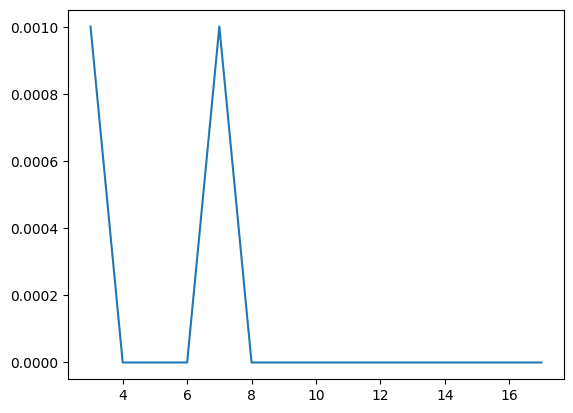

In [11]:
#Ahora realizamos los gráficos

#Gráfico tiempo n función de la cantidad de links
fig, ax = plt.subplots()
ax.plot(cant_links,time_links)
plt.show()

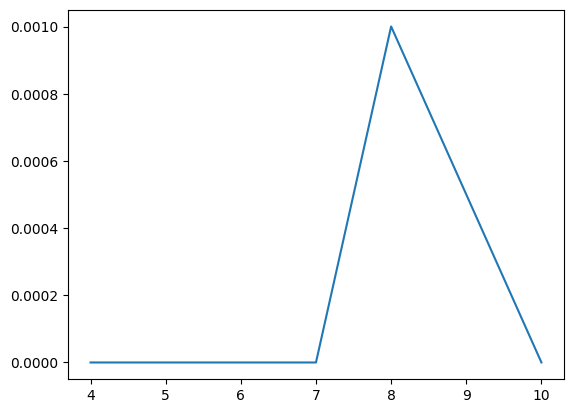

In [12]:
#Gráfico tiempo n función de la cantidad de pag
fig, ax = plt.subplots()
ax.plot(cant_pag,time_pag)
plt.show()

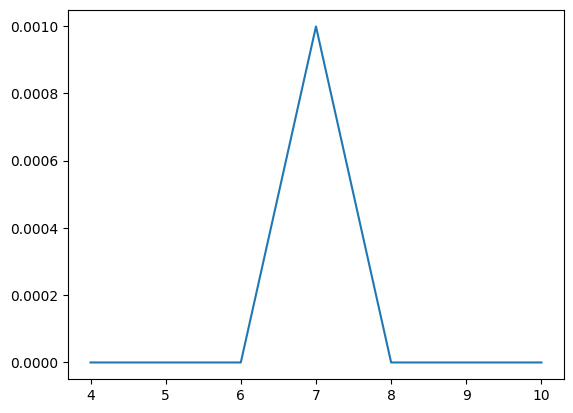

In [13]:
#Gráfico tiempo n función de la cantidad de pag
fig, ax = plt.subplots()
ax.plot(cant_ambas,time_ambas)
plt.show()

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


In [14]:
#Nombro todos los tests
instagram_famosos = leer_archivo('./tests/instagram_famosos_grafo.txt')
mathworld = leer_archivo('./tests/mathworld_grafo.txt')
test_15s = leer_archivo('./tests/test_15_segundos.txt')
test_30s = leer_archivo('./tests/test_30_segundos.txt')
test_aleatorio = leer_archivo('./tests/test_aleatorio.txt')
test_dos_estrellas = leer_archivo('./tests/test_dosestrellas.txt')

#Todos los valores de p a probar
variacion_p = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5] 

In [15]:
#Instagram famosos: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []
for value in variacion_p:
    rnk,scr = calcularRanking(instagram_famosos,value)
    fst = -1
    snd = -1
    thr = -1
    for _ in range(3):
        for i in range(len(instagram_famosos)):
            if rnk[i] == 1 and scr[i] != fst:
                fst = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 2 and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 2 and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 3:
                thr = scr[i]
    scr_1.append(fst)
    scr_2.append(snd)
    scr_3.append(thr)
                

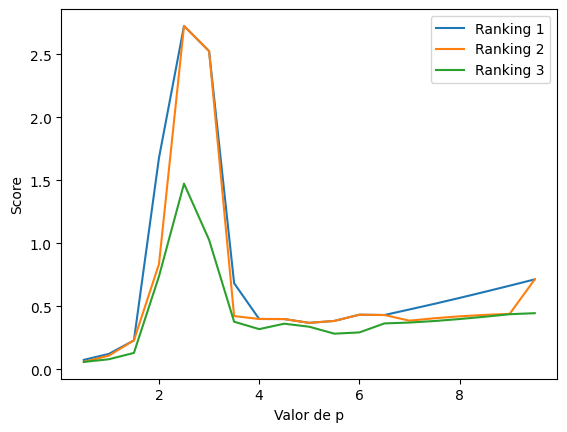

In [16]:
fig, ax = plt.subplots()
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = "Ranking 1")
ax.plot(variacion_p,scr_2, label = 'Ranking 2')
ax.plot(variacion_p,scr_3, label = 'Ranking 3')
ax.legend()
plt.show()

In [17]:
#Mathworld: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []
for value in variacion_p:
    rnk,scr = calcularRanking(mathworld,value)
    fst = -1
    snd = -1
    thr = -1
    for _ in range(3):
        for i in range(len(mathworld)):
            if rnk[i] == 1 and scr[i] != fst:
                fst = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 2 and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 2 and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 3:
                thr = scr[i]
    scr_1.append(fst)
    scr_2.append(snd)
    scr_3.append(thr)

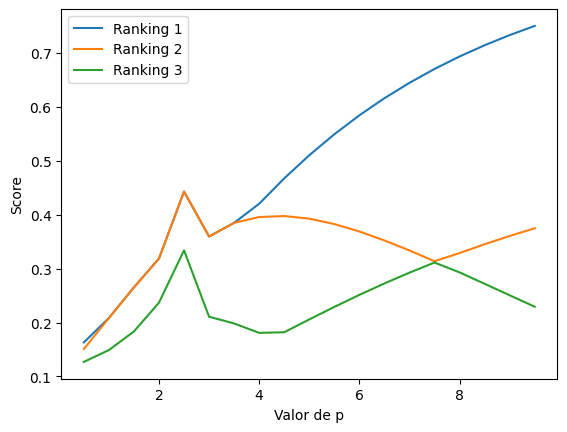

In [18]:
fig, ax = plt.subplots()
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = "Ranking 1")
ax.plot(variacion_p,scr_2, label = 'Ranking 2')
ax.plot(variacion_p,scr_3, label = 'Ranking 3')
ax.legend()
plt.show()

In [19]:
#test_aleatorio: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []
for value in variacion_p:
    rnk,scr = calcularRanking(test_aleatorio,value)
    fst = -1
    snd = -1
    thr = -1
    for _ in range(3):
        for i in range(len(test_aleatorio)):
            if rnk[i] == 1 and scr[i] != fst:
                fst = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 2 and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 2 and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 3:
                thr = scr[i]
    scr_1.append(fst)
    scr_2.append(snd)
    scr_3.append(thr)

Error: Hubo un 0 en la diagonal (El pivote es 0 y no existe factorizacion LU)
Error: Hubo un 0 en la diagonal (El pivote es 0 y no existe factorizacion LU)


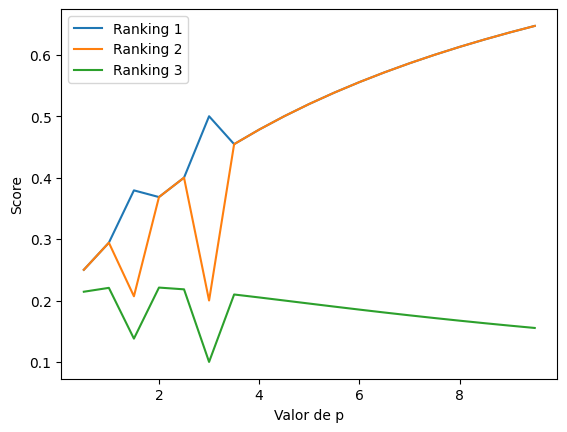

In [20]:
fig, ax = plt.subplots()
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = "Ranking 1")
ax.plot(variacion_p,scr_2, label = 'Ranking 2')
ax.plot(variacion_p,scr_3, label = 'Ranking 3')
ax.legend()
plt.show()

In [22]:
#test_dos estrellas: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []
for value in variacion_p:
    rnk,scr = calcularRanking(test_dos_estrellas,value)
    fst = -1
    snd = -1
    thr = -1
    for _ in range(3):
        for i in range(len(test_dos_estrellas)):
            if rnk[i] == 1 and scr[i] != fst:
                fst = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 1 and scr[i] == fst and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 2 and scr[i] != snd:
                snd = scr[i]
            elif rnk[i] == 2 and scr[i] == snd and scr[i] != thr:
                thr = scr[i]
            elif rnk[i] == 3:
                thr = scr[i]
    scr_1.append(fst)
    scr_2.append(snd)
    scr_3.append(thr)

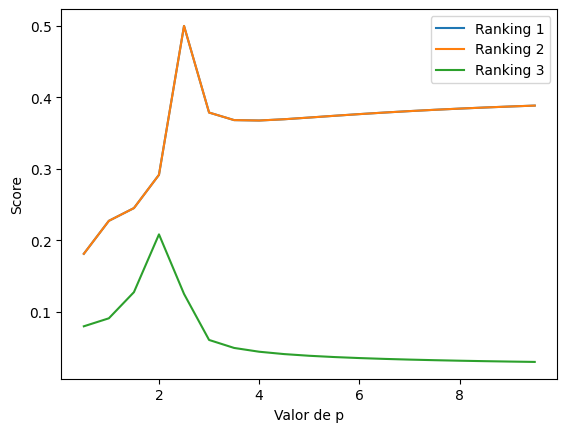

In [23]:
plt.xlabel('Valor de p')
plt.ylabel('Score')
plt.plot(variacion_p,scr_1, label = "Ranking 1")
plt.plot(variacion_p,scr_2, label = 'Ranking 2')
plt.plot(variacion_p,scr_3, label = 'Ranking 3')
plt.legend()
plt.show()

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.

